# Red Wine Quality prediction 

In [42]:
# !pip install imblearn
# !pip install xgboost

In [40]:
import sklearn
print(sklearn.__version__)

0.21.3


In [52]:
# import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
# from sklearn import svm, grid_search
from sklearn.metrics import accuracy_score
import xgboost as xgb
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import scale
from scipy.stats import pearsonr
from tqdm import tqdm_notebook as tqdm

In [3]:
data = pd.read_csv('winequality-red.csv')

In [4]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


#### we notice the data is clean without any Null values

In [6]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [9]:
corr = data.corr()
corr.style.background_gradient(cmap='coolwarm')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1,-0.256131,0.671703,0.114777,0.0937052,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.0616683,0.124052
volatile acidity,-0.256131,1,-0.552496,0.00191788,0.0612978,-0.0105038,0.07647,0.0220262,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1,0.143577,0.203823,-0.0609781,0.035533,0.364947,-0.541904,0.31277,0.109903,0.226373
residual sugar,0.114777,0.00191788,0.143577,1,0.0556095,0.187049,0.203028,0.355283,-0.0856524,0.00552712,0.0420754,0.0137316
chlorides,0.0937052,0.0612978,0.203823,0.0556095,1,0.00556215,0.0474005,0.200632,-0.265026,0.37126,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.0105038,-0.0609781,0.187049,0.00556215,1,0.667666,-0.0219458,0.0703775,0.0516576,-0.0694084,-0.0506561
total sulfur dioxide,-0.113181,0.07647,0.035533,0.203028,0.0474005,0.667666,1,0.0712695,-0.0664946,0.0429468,-0.205654,-0.1851
density,0.668047,0.0220262,0.364947,0.355283,0.200632,-0.0219458,0.0712695,1,-0.341699,0.148506,-0.49618,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.0856524,-0.265026,0.0703775,-0.0664946,-0.341699,1,-0.196648,0.205633,-0.0577314
sulphates,0.183006,-0.260987,0.31277,0.00552712,0.37126,0.0516576,0.0429468,0.148506,-0.196648,1,0.0935948,0.251397


In [7]:
data['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

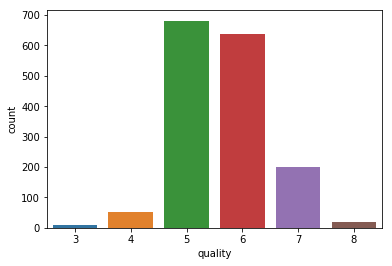

In [8]:
sns.countplot(data['quality'])

###### When we plot the count of quality in the data. We observe imbalance in Labels 

In [18]:
# Features and Label split
X = np.array(data.ix[:, data.columns != 'quality']) 
y = np.array(data.ix[:, data.columns == 'quality'])

G:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.
G:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


In [19]:
X_train, x_test, Y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42) # test train split

In [107]:
print("Number of samples in X_train dataset: ", X_train.shape)
print("Number of samples in y_train dataset: ", Y_train.shape)
print("Number of samples in X_test dataset: ", x_test.shape)
print("Number of samples in y_test dataset: ", y_test.shape)

Number of samples in X_train dataset:  (1199, 11)
Number of samples in y_train dataset:  (1199, 1)
Number of samples in X_test dataset:  (400, 11)
Number of samples in y_test dataset:  (400, 1)


In [108]:
for i in range(10):
    counts = sum(Y_train==i)
    if counts != 0:
        print("Before OverSampling, counts of quality "+ str(i) + " : {}".format(counts))
    else:
        continue

Before OverSampling, counts of quality 3 : [9]
Before OverSampling, counts of quality 4 : [40]
Before OverSampling, counts of quality 5 : [517]
Before OverSampling, counts of quality 6 : [469]
Before OverSampling, counts of quality 7 : [151]
Before OverSampling, counts of quality 8 : [13]


#### To fix class imbalance we use SMOTE (Synthetic Minority Oversampling Technique).
#### This is done to improve model training. 

In [109]:
sm = SMOTE(random_state=2) 
X_train_res, y_train_res = sm.fit_sample(X_train, Y_train.ravel())

###### After Oversampling we find the number of class instances to be equal.

In [110]:
for i in range(10):
    counts = sum(y_train_res==i)
    if counts != 0:
        print("After OverSampling, counts of quality "+ str(i) + " : {}".format(counts))
    else:
        continue

After OverSampling, counts of quality 3 : 517
After OverSampling, counts of quality 4 : 517
After OverSampling, counts of quality 5 : 517
After OverSampling, counts of quality 6 : 517
After OverSampling, counts of quality 7 : 517
After OverSampling, counts of quality 8 : 517


## XGBoost Classification

In [113]:
def XGB_param_selection(X, y, nfolds):
    learning_rate = [0.01, 0.1, 1]
    nos = np.linspace(1, 50, num=50)
    depth = np.linspace(1, 20, num=20)
    numbers = [ int(x) for x in nos ]
    m_d = [ int(x) for x in depth ]
    param_grid = {'n_estimators': numbers,'max_depth':m_d,'learning_rate':learning_rate}
    # Grid Search to find best parameters for the model
    # from here : https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
    grid_search = GridSearchCV(xgb.XGBClassifier(subsample=0.5), param_grid, cv=nfolds)
    grid_search.fit(X, y)
    grid_search.best_params_
    return grid_search.best_params_

In [114]:
print(XGB_param_selection(X_train_res,y_train_res,3))

{'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 49}


In [115]:
clf = xgb.XGBClassifier(n_estimators=49, max_depth=10, learning_rate=0.1, subsample=0.5)
clf.fit(X_train_res, y_train_res)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=10,
              min_child_weight=1, missing=None, n_estimators=49, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.5, verbosity=1)

In [117]:
predicted = clf.predict(x_test)

print(accuracy_score(y_test, predicted))

0.6275


In [118]:
print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.13      0.23      0.17        13
           5       0.73      0.66      0.70       164
           6       0.68      0.62      0.65       169
           7       0.55      0.71      0.62        48
           8       0.12      0.20      0.15         5

    accuracy                           0.63       400
   macro avg       0.37      0.40      0.38       400
weighted avg       0.66      0.63      0.64       400



### Support Vector Classifier

In [119]:
from sklearn.svm import SVC

In [121]:
param = {
    'C': [0.1,0.8,0.9,1,1.1,1.2,1.3,1.4],
    'kernel':['linear', 'rbf'],
    'gamma' :[0.1,0.8,0.9,1,1.1,1.2,1.3,1.4]
}
svc = SVC()
grid_svc = GridSearchCV(svc, param_grid=param, scoring='accuracy', cv=10)

In [124]:
grid_svc.fit(X_train_res, y_train_res)
print(grid_svc.best_params_)

G:\Anaconda\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'C': 1.3, 'gamma': 0.8, 'kernel': 'rbf'}


In [125]:
svc2 = SVC(C = 1.2, gamma =  0.8, kernel= 'rbf')
svc2.fit(X_train_res, y_train_res)
pred_svc2 = svc2.predict(x_test)
print(classification_report(y_test, pred_svc2))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.12      0.08      0.10        13
           5       0.52      0.80      0.63       164
           6       0.62      0.40      0.49       169
           7       0.76      0.40      0.52        48
           8       0.00      0.00      0.00         5

    accuracy                           0.55       400
   macro avg       0.34      0.28      0.29       400
weighted avg       0.57      0.55      0.53       400



### Neural Networks 

In [126]:
from sklearn import preprocessing

In [127]:
X = data.drop('quality', axis = 1)
y = data['quality']

In [128]:
normalized_X=(X-X.mean())/X.std()

In [129]:
normalized_X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.528194,0.961576,-1.391037,-0.453077,-0.243630,-0.466047,-0.379014,0.558100,1.288240,-0.579025,-0.959946
1,-0.298454,1.966827,-1.391037,0.043403,0.223805,0.872365,0.624168,0.028252,-0.719708,0.128910,-0.584594
2,-0.298454,1.296660,-1.185699,-0.169374,0.096323,-0.083643,0.228975,0.134222,-0.331073,-0.048074,-0.584594
3,1.654339,-1.384011,1.483689,-0.453077,-0.264878,0.107558,0.411372,0.664069,-0.978798,-0.461036,-0.584594
4,-0.528194,0.961576,-1.391037,-0.453077,-0.243630,-0.466047,-0.379014,0.558100,1.288240,-0.579025,-0.959946


In [132]:
y = pd.get_dummies(y)

In [133]:
print(y)

      3  4  5  6  7  8
0     0  0  1  0  0  0
1     0  0  1  0  0  0
2     0  0  1  0  0  0
3     0  0  0  1  0  0
4     0  0  1  0  0  0
5     0  0  1  0  0  0
6     0  0  1  0  0  0
7     0  0  0  0  1  0
8     0  0  0  0  1  0
9     0  0  1  0  0  0
10    0  0  1  0  0  0
11    0  0  1  0  0  0
12    0  0  1  0  0  0
13    0  0  1  0  0  0
14    0  0  1  0  0  0
15    0  0  1  0  0  0
16    0  0  0  0  1  0
17    0  0  1  0  0  0
18    0  1  0  0  0  0
19    0  0  0  1  0  0
20    0  0  0  1  0  0
21    0  0  1  0  0  0
22    0  0  1  0  0  0
23    0  0  1  0  0  0
24    0  0  0  1  0  0
25    0  0  1  0  0  0
26    0  0  1  0  0  0
27    0  0  1  0  0  0
28    0  0  1  0  0  0
29    0  0  0  1  0  0
...  .. .. .. .. .. ..
1569  0  0  0  1  0  0
1570  0  0  0  1  0  0
1571  0  0  0  1  0  0
1572  0  0  1  0  0  0
1573  0  0  0  1  0  0
1574  0  0  0  1  0  0
1575  0  0  0  1  0  0
1576  0  0  0  1  0  0
1577  0  0  0  1  0  0
1578  0  0  0  1  0  0
1579  0  0  1  0  0  0
1580  0  0 

In [134]:
X_train, x_test, Y_train, y_test = train_test_split(normalized_X, y, test_size=0.25, random_state=42)

In [138]:
class RegNN(nn.Module):
    def __init__(self):
        super(RegNN, self).__init__()
        self.l1 = nn.Linear(11,128)
        self.l2 = nn.Linear(128,64)
        self.l3 = nn.Linear(64,32)
        self.l4 = nn.Linear(32,6)
        self.drop = nn.Dropout(0.2)
    
    def forward(self,x):
        x = torch.relu(self.l1(x))
        x = self.drop(x)
        x = torch.relu(self.l2(x))
        x = self.drop(x)
        x = torch.relu(self.l3(x))
        return torch.log_softmax(self.l4(x),dim = 1)
model = RegNN()
model.cuda()
criterion = nn.CrossEntropyLoss()
optimiser = torch.optim.Adam(model.parameters(),lr=0.01)

In [139]:
print(model)

RegNN(
  (l1): Linear(in_features=11, out_features=128, bias=True)
  (l2): Linear(in_features=128, out_features=64, bias=True)
  (l3): Linear(in_features=64, out_features=32, bias=True)
  (l4): Linear(in_features=32, out_features=6, bias=True)
  (drop): Dropout(p=0.2)
)


In [144]:
loss_lst = []
X_torch = torch.from_numpy(X_train.to_numpy().astype('float32')).cuda()
y_torch = torch.from_numpy(Y_train.to_numpy().astype('float32')).cuda()

for epoch in tqdm(range(15000)):
    optimiser.zero_grad()
    y_pred = model(X_torch)
#     loss = criterion(y_pred, y_torch)
    loss = criterion(y_pred, torch.max(y_torch, 1)[1])
    loss_lst.append(loss.data)
    
    loss.backward()
    optimiser.step()

Exception in thread Thread-16:
Traceback (most recent call last):
  File "G:\Anaconda\lib\threading.py", line 916, in _bootstrap_inner
    self.run()
  File "G:\Anaconda\lib\site-packages\tqdm\_monitor.py", line 62, in run
    for instance in self.tqdm_cls._instances:
  File "G:\Anaconda\lib\_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration



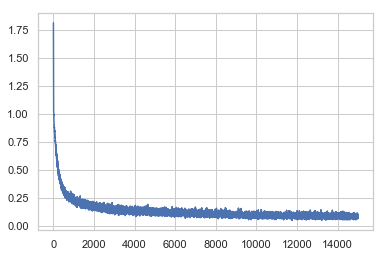

In [145]:
plt.plot(loss_lst)

In [146]:
loss_lst[-1]

tensor(0.0780, device='cuda:0')

In [149]:
X_test_torch = torch.from_numpy(x_test.to_numpy().astype('float32')).cuda()
y_test_torch = torch.from_numpy(y_test.to_numpy().astype('float32')).cuda()
with torch.no_grad():
    model.eval()
    y_pred = model(X_test_torch)

In [153]:
ps = torch.exp(y_pred)
ps.shape

torch.Size([400, 6])

In [163]:
top_p, top_class = ps.topk(1, dim = 1)
print(top_class[:10,:])

tensor([[2],
        [2],
        [3],
        [2],
        [3],
        [2],
        [2],
        [2],
        [1],
        [3]], device='cuda:0')


In [168]:
_, top_class_labels = y_test_torch.topk(1, dim = 1)
print(top_class_labels[:10,:])

tensor([[3],
        [2],
        [3],
        [2],
        [3],
        [2],
        [2],
        [2],
        [2],
        [3]], device='cuda:0')


In [169]:
print(top_class.shape)
print(top_class_labels.shape)

torch.Size([400, 1])
torch.Size([400, 1])


In [170]:
equals = top_class == top_class_labels.view(*top_class.shape)
print(equals[:10,:])

tensor([[0],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [0],
        [1]], device='cuda:0', dtype=torch.uint8)


In [171]:
accuracy = torch.mean(equals.type(torch.FloatTensor))
print(f"Accuracy is  - {accuracy.item() *100}%")

Accuracy is  - 64.74999785423279%
